#### CNN 모델
- 특징 추출 부분 + 분류 부분
- Convolution Layer + Dense Layer

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Input
from tensorflow.keras.datasets.fashion_mnist import load_data


import numpy as np
import matplotlib.pyplot as plt

[1] 데이터 준비

In [99]:
(X_train, y_train), (X_test, y_test) = load_data()

In [100]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [101]:
X_test[0].shape

(28, 28)

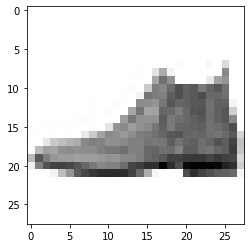

In [102]:
plt.imshow(X_test[0], cmap='binary')
plt.show()

[2] 모델 생성

[2-1] 모델 설계
- 데이터셋 : 이미지 데이터셋, 흑백이미지 ==> 채널 1
- Conv2D + Dense

✔️ 특징맵 추출 부분 => Convolution 단계

In [103]:
fashionModel = Sequential(name='fashion')

In [104]:
# fashionModel.add(Input(shape=(28, 28, 1)))

In [105]:
# 3 x 3 크기의 필터 1개로 특징맵 추출
fashionModel.add(Conv2D(1, (3, 3), input_shape=(28, 28, 1)))

In [106]:
from tensorflow.keras.layers import MaxPooling2D

In [107]:
# 특징맨에서 주요 특징 다시 추출 ==> 크기가 반으로 줄어듦
fashionModel.add(MaxPooling2D())

In [108]:
fashionModel.add(Conv2D(1, (3, 3)))

In [109]:
fashionModel.add(MaxPooling2D())

✔️ 특징맵 데이터를 사용해서 분류

In [110]:
# 1차원으로 변환
fashionModel.add(Flatten())

In [111]:
# 분류층
fashionModel.add(Dense(10, activation='softmax'))

✔️ 모델 정보 확인

In [112]:
fashionModel.summary()

Model: "fashion"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 1)         10        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 1)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                260       
Total params: 280
Trainable params: 280
Non-trainable params: 0
_____________________________________________________________

[2-2] 모델 생성

In [113]:
fashionModel.compile(optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy',
                     metrics = ['acc'])

[3] 학습

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train[1], 1)

In [114]:
fashionModel.fit(X_train, y_train, epochs = 10)

Epoch 1/10


ValueError: in user code:

    c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\ProgramData\Anaconda3\envs\DL\lib\site-packages\keras\engine\input_spec.py:234 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer fashion is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)
